# EDA

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE

data_dict_2 = {
    "Feature_ae_0": "Age",
    "Feature_dn_1": "CallDur",
    "Feature_cn_2": "CallNum",
    "Feature_ps_3": "LastCamp",
    "Feature_ps_4": "PrevCall",
    "Feature_ee_5": "EmpRate",
    "Feature_cx_6": "CPI",
    "Feature_cx_7": "ConfIdx",
    "Feature_em_8": "IntRate",
    "Feature_nd_9": "EmpNum",
    "Feature_jd_10": "JobType",
    "Feature_md_11": "MarStat",
    "Feature_ed_12": "EduLvl",
    "Feature_dd_13": "Default",
    "Feature_hd_14": "HomeLn",
    "Feature_ld_15": "PersLn",
    "Feature_cd_16": "Contact",
    "Feature_md_17": "Month",
    "Feature_dd_18": "DayWk",
    "Feature_pd_19": "PrevRes",
    "Response": "Accept"
}

df = pd.read_csv('dataset.csv', delimiter='|')
df.head()

,Feature_ae_0,Feature_dn_1,Feature_cn_2,Feature_ps_3,Feature_ps_4,Feature_ee_5,Feature_cx_6,Feature_cx_7,Feature_em_8,Feature_nd_9,...,Feature_md_11,Feature_ed_12,Feature_dd_13,Feature_hd_14,Feature_ld_15,Feature_cd_16,Feature_md_17,Feature_dd_18,Feature_pd_19,Response
0,57,371,1,999,1,-1.8,92.893,-46.2,1.299,5099.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_2_y***s,Cat_0_c***r,Cat_6_m***y,Cat_1_m***n,Cat_0_f***e,0
1,55,285,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,Cat_1_m***d,Cat_7_u***n,Cat_1_u***n,Cat_2_y***s,Cat_0_n***o,Cat_1_t***e,Cat_6_m***y,Cat_2_t***u,Cat_1_n***t,0
2,33,52,1,999,1,-1.8,92.893,-46.2,1.313,5099.1,...,Cat_1_m***d,Cat_2_b***y,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_0_c***r,Cat_6_m***y,Cat_0_f***i,Cat_0_f***e,0
3,36,355,4,999,0,1.4,94.465,-41.8,4.967,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_0_n***o,Cat_0_n***o,Cat_1_t***e,Cat_4_j***n,Cat_0_f***i,Cat_1_n***t,0
4,27,189,2,999,0,1.4,93.918,-42.7,4.963,5228.1,...,Cat_1_m***d,Cat_3_h***l,Cat_0_n***o,Cat_2_y***s,Cat_0_n***o,Cat_0_c***r,Cat_3_j***l,Cat_0_f***i,Cat_1_n***t,0


In [133]:
df3 = df.copy()
df3.rename(columns=data_dict_2, inplace=True)
print(df3.columns.to_list())

['Age', 'CallDur', 'CallNum', 'LastCamp', 'PrevCall', 'EmpRate', 'CPI', 'ConfIdx', 'IntRate', 'EmpNum', 'JobType', 'MarStat', 'EduLvl', 'Default', 'HomeLn', 'PersLn', 'Contact', 'Month', 'DayWk', 'PrevRes', 'Accept']


In [54]:
from ydata_profiling import ProfileReport


profile = ProfileReport(df3, title="Pandas Profiling Report")

# Save the report to HTML
# profile.to_file("profile_report.html")

# Data Pre-processing

## Train Test Splitting

In [55]:
# train test val splitting for df3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


train_df, test_df = train_test_split(df3, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.125, random_state=42)

# This yields:
# Train: 70% (0.8 * 0.875)
# Val: 10% (0.8 * 0.125)
# Test: 20%

In [56]:
train_df.iloc[0]

Age                  38
CallDur             150
CallNum               1
LastCamp            999
PrevCall              0
EmpRate             1.4
CPI              93.918
ConfIdx           -42.7
IntRate           4.955
EmpNum           5228.1
JobType     Cat_1_b***r
MarStat     Cat_1_m***d
EduLvl      Cat_0_b***y
Default     Cat_0_n***o
HomeLn      Cat_0_n***o
PersLn      Cat_0_n***o
Contact     Cat_1_t***e
Month       Cat_3_j***l
DayWk       Cat_3_t***e
PrevRes     Cat_1_n***t
Accept                0
Name: 3625, dtype: object

In [57]:
df3["Month"].value_counts()

Month
Cat_6_m***y    11739
Cat_3_j***l     6125
Cat_1_a***g     5193
Cat_4_j***n     4539
Cat_7_n***v     3482
Cat_0_a***r     2231
Cat_8_o***t      603
Cat_9_s***p      478
Cat_5_m***r      457
Cat_2_d***c      153
Name: count, dtype: int64

## Duplicates/Missing Values Removal

In [58]:
# Remove duplicates:
train_df = train_df.drop_duplicates()
val_df = val_df.drop_duplicates()
test_df = test_df.drop_duplicates()

# For missing values: either drop or impute.
train_df = train_df.dropna()
val_df = val_df.dropna()
test_df = test_df.dropna()

## Outliers Removal

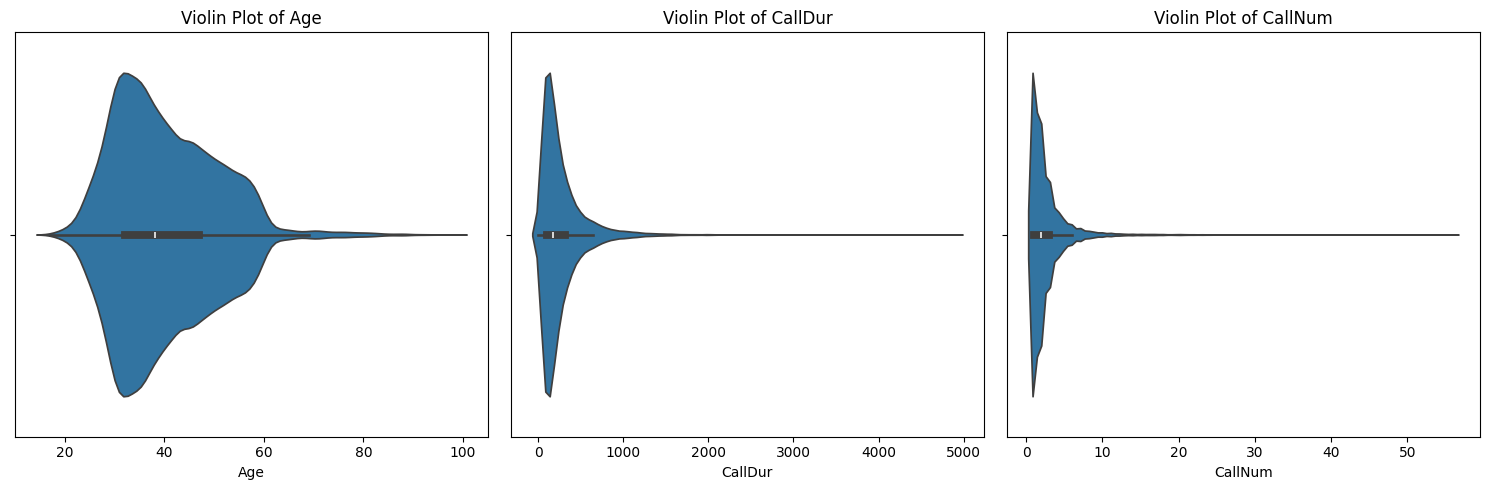

In [59]:
import seaborn as sns

def remove_outliers(df, num_cols):
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Identify numeric columns:
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
for c in ["Accept",
          "LastCamp",
          "PrevCall",
          "EmpRate",
          "CPI",
          "ConfIdx",
          "IntRate",
          "EmpNum"]:
    numeric_cols.remove(c)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    sns.violinplot(x=train_df[col], ax=axes[i])
    axes[i].set_title(f"Violin Plot of {col}")
    axes[i].set_xlabel(col)

fig.tight_layout()
plt.show()

24494
21128


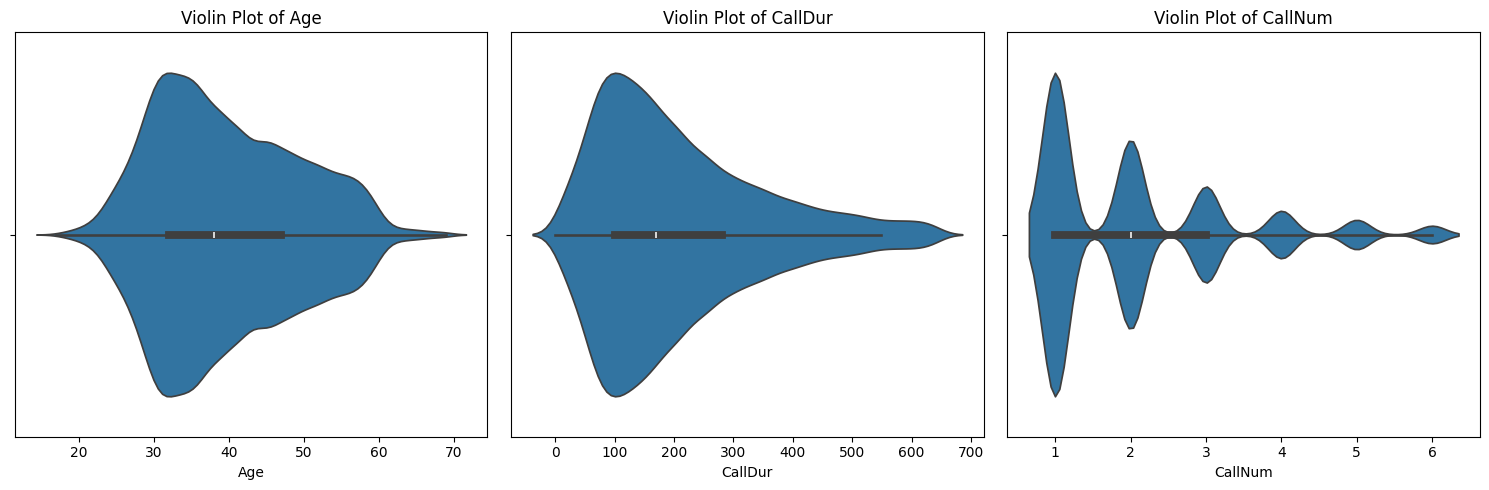

In [60]:
# Remove outliers only on the training set (to avoid data leakage):
print(len(train_df))
train_df = remove_outliers(train_df, numeric_cols)
print(len(train_df))


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    sns.violinplot(x=train_df[col], ax=axes[i])
    axes[i].set_title(f"Violin Plot of {col}")
    axes[i].set_xlabel(col)

fig.tight_layout()
plt.show()

## Categorical Data Encoding

In [61]:
train_df["Month"].value_counts()

Month
Cat_6_m***y    7264
Cat_3_j***l    3510
Cat_1_a***g    3128
Cat_4_j***n    2673
Cat_7_n***v    2208
Cat_0_a***r    1336
Cat_8_o***t     374
Cat_9_s***p     283
Cat_5_m***r     274
Cat_2_d***c      78
Name: count, dtype: int64

In [62]:
import pandas as pd

daywk_mapping = {
    "Cat_2_t***u": 3, # Tuesday = 3
    "Cat_1_m***n": 2, # Monday = 2
    "Cat_4_w***d": 4, # Wednesday = 4
    "Cat_3_t***e": 5, # Thursday = 5
    "Cat_0_f***i": 6  # Friday = 6
}


month_mapping = {
    "Cat_6_m***y": 5,  # May = 5
    "Cat_3_j***l": 7,  # July = 7
    "Cat_1_a***g": 8,  # August = 8
    "Cat_4_j***n": 6,  # June = 6
    "Cat_7_n***v": 11, # November = 11
    "Cat_0_a***r": 4,  # April = 4
    "Cat_8_o***t": 10, # October = 10
    "Cat_9_s***p": 9,  # September = 9
    "Cat_5_m***r": 3,  # March = 3
    "Cat_2_d***c": 12 # December = 12
}

# apply map to train, val and test
train_df['DayWk'] = train_df['DayWk'].map(daywk_mapping)
val_df['DayWk'] = val_df['DayWk'].map(daywk_mapping)
test_df['DayWk'] = test_df['DayWk'].map(daywk_mapping)

# apply map to train, val and test for month
train_df['Month'] = train_df['Month'].map(month_mapping)
val_df['Month'] = val_df['Month'].map(month_mapping)
test_df['Month'] = test_df['Month'].map(month_mapping)

In [63]:
np.sin(2 * np.pi * 5 / 12)

np.float64(0.49999999999999994)

In [64]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21128 entries, 3625 to 28916
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       21128 non-null  int64  
 1   CallDur   21128 non-null  int64  
 2   CallNum   21128 non-null  int64  
 3   LastCamp  21128 non-null  int64  
 4   PrevCall  21128 non-null  int64  
 5   EmpRate   21128 non-null  float64
 6   CPI       21128 non-null  float64
 7   ConfIdx   21128 non-null  float64
 8   IntRate   21128 non-null  float64
 9   EmpNum    21128 non-null  float64
 10  JobType   21128 non-null  object 
 11  MarStat   21128 non-null  object 
 12  EduLvl    21128 non-null  object 
 13  Default   21128 non-null  object 
 14  HomeLn    21128 non-null  object 
 15  PersLn    21128 non-null  object 
 16  Contact   21128 non-null  object 
 17  Month     21128 non-null  int64  
 18  DayWk     21128 non-null  int64  
 19  PrevRes   21128 non-null  object 
 20  Accept    21128 non-null  int6

In [65]:
def encode_categories(train, valid, test):
    # Create copies
    train_out, valid_out, test_out = train.copy(), valid.copy(), test.copy()

    # Define columns to encode with each technique:
    label_cols = ["JobType", "EduLvl"]
    onehot_cols = ["MarStat", "HomeLn", "PersLn", "Contact", "Default", "PrevRes"]
    def cyclical_encode(df, col, period):
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col + '_sin'] = np.sin(2 * np.pi * df[col] / period).astype(np.float64)
        df[col + '_cos'] = np.cos(2 * np.pi * df[col] / period).astype(np.float64)
        df.drop(columns=col, inplace=True)
        return df

    for df in [train_out, valid_out, test_out]:
        # Apply cyclical encoding for Month (period=12) and DayWk (period=7)
        for col, period in [("Month", 12), ("DayWk", 7)]:
            if col in df.columns:
                df = cyclical_encode(df, col, period)

    # One-Hot encode:
    for col in onehot_cols:
        if col in train_out.columns:
            train_dummies = pd.get_dummies(train_out[col], prefix=col)
            valid_dummies = pd.get_dummies(valid_out[col], prefix=col)
            test_dummies  = pd.get_dummies(test_out[col], prefix=col)
            train_out = train_out.join(train_dummies).drop(col, axis=1)
            valid_out = valid_out.join(valid_dummies).drop(col, axis=1)
            test_out  = test_out.join(test_dummies).drop(col, axis=1)
            # Align columns: fill missing columns with 0
            train_out, valid_out = train_out.align(valid_out, join='left', axis=1, fill_value=0)
            train_out, test_out  = train_out.align(test_out, join='left', axis=1, fill_value=0)

    # Label encode binary columns:
    le = LabelEncoder()
    for col in label_cols:
        if col in train_out.columns:
            train_out[col] = le.fit_transform(train_out[col])
            valid_out[col] = le.transform(valid_out[col])
            test_out[col]  = le.transform(test_out[col])
            
    return train_out, valid_out, test_out


train_df, val_df, test_df = encode_categories(train_df, val_df, test_df)

train_df = train_df.replace({True: 1, False: 0})
val_df = val_df.replace({True: 1, False: 0})
test_df = test_df.replace({True: 1, False: 0})

C:\Users\Christian\AppData\Local\Temp\ipykernel_17668\2594640074.py:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df = train_df.replace({True: 1, False: 0})
C:\Users\Christian\AppData\Local\Temp\ipykernel_17668\2594640074.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  val_df = val_df.replace({True: 1, False: 0})
C:\Users\Christian\AppData\Local\Temp\ipykernel_17668\2594640074.py:49: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, ex

## Numerical Data Standardization

In [66]:
scaler = StandardScaler()

# Fit only on training numeric columns:
train_numeric = train_df[numeric_cols]
val_numeric   = val_df[numeric_cols]
test_numeric  = test_df[numeric_cols]

scaler.fit(train_numeric)

train_df[numeric_cols] = scaler.transform(train_numeric)
val_df[numeric_cols]   = scaler.transform(val_numeric)
test_df[numeric_cols]  = scaler.transform(test_numeric)

In [67]:
# X_train = train_df.drop('Accept', axis=1)
# y_train = train_df['Accept']

# sm = SMOTE(random_state=42)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# # Replace original training data with balanced data:
# train_df = pd.concat([X_train_res, y_train_res], axis=1)

In [68]:
train_df.iloc[5234]

Age                       0.861116
CallDur                   2.293843
CallNum                  -0.028999
LastCamp                999.000000
PrevCall                  0.000000
EmpRate                   1.100000
CPI                      93.994000
ConfIdx                 -36.400000
IntRate                   4.857000
EmpNum                 5191.000000
JobType                   3.000000
EduLvl                    2.000000
Accept                    0.000000
Month_sin                 0.500000
Month_cos                -0.866025
DayWk_sin                 0.974928
DayWk_cos                -0.222521
MarStat_Cat_0_d***d       0.000000
MarStat_Cat_1_m***d       1.000000
MarStat_Cat_2_s***e       0.000000
MarStat_Cat_3_u***n       0.000000
HomeLn_Cat_0_n***o        0.000000
HomeLn_Cat_1_u***n        0.000000
HomeLn_Cat_2_y***s        1.000000
PersLn_Cat_0_n***o        1.000000
PersLn_Cat_1_u***n        0.000000
PersLn_Cat_2_y***s        0.000000
Contact_Cat_0_c***r       0.000000
Contact_Cat_1_t***e 

In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21128 entries, 3625 to 28916
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  21128 non-null  float64
 1   CallDur              21128 non-null  float64
 2   CallNum              21128 non-null  float64
 3   LastCamp             21128 non-null  int64  
 4   PrevCall             21128 non-null  int64  
 5   EmpRate              21128 non-null  float64
 6   CPI                  21128 non-null  float64
 7   ConfIdx              21128 non-null  float64
 8   IntRate              21128 non-null  float64
 9   EmpNum               21128 non-null  float64
 10  JobType              21128 non-null  int64  
 11  EduLvl               21128 non-null  int64  
 12  Accept               21128 non-null  int64  
 13  Month_sin            21128 non-null  float64
 14  Month_cos            21128 non-null  float64
 15  DayWk_sin            21128 non-null  f

In [70]:
train_df.columns

Index(['Age', 'CallDur', 'CallNum', 'LastCamp', 'PrevCall', 'EmpRate', 'CPI',
       'ConfIdx', 'IntRate', 'EmpNum', 'JobType', 'EduLvl', 'Accept',
       'Month_sin', 'Month_cos', 'DayWk_sin', 'DayWk_cos',
       'MarStat_Cat_0_d***d', 'MarStat_Cat_1_m***d', 'MarStat_Cat_2_s***e',
       'MarStat_Cat_3_u***n', 'HomeLn_Cat_0_n***o', 'HomeLn_Cat_1_u***n',
       'HomeLn_Cat_2_y***s', 'PersLn_Cat_0_n***o', 'PersLn_Cat_1_u***n',
       'PersLn_Cat_2_y***s', 'Contact_Cat_0_c***r', 'Contact_Cat_1_t***e',
       'Default_Cat_0_n***o', 'Default_Cat_1_u***n', 'Default_Cat_2_y***s',
       'PrevRes_Cat_0_f***e', 'PrevRes_Cat_1_n***t', 'PrevRes_Cat_2_s***s'],
      dtype='object')

In [71]:
len(train_df.columns)

35

In [72]:
# import featuretools as ft


# # Create an entity set
# es = ft.EntitySet(id="data")

# # Add the dataframe as an entity. If you have additional relational data, add them similarly.
# es = es.add_dataframe(dataframe_name="train", dataframe=train_df, index="index", make_index=True)

# # Run Deep Feature Synthesis (DFS)
# feature_matrix, feature_defs = ft.dfs(entityset=es,
#                                         target_dataframe_name="train",
#                                         max_depth=2)
# feature_matrix

# Model Training and Evaluation

## Model Training Setup

In [73]:
!wandb login 

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\Christian\_netrc
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


In [74]:
X_train = train_df.drop('Accept', axis=1)
y_train = train_df['Accept']
X_test = test_df.drop('Accept', axis=1)
y_test = test_df['Accept']

In [75]:
import wandb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, f1_score

# --- Import Classifiers from sklearn and other libraries ---
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier # Note: LightGBM is needed separately
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier # Import XGBoost
from sklearn.naive_bayes import CategoricalNB # Import CategoricalNB
from sklearn.experimental import enable_hist_gradient_boosting # Needed for HistGradientBoostingClassifier - uncomment if you decide to include it later
# from sklearn.experimental import FixedThresholdClassifier # Note: This might not be directly available - check sklearn version
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import StackingClassifier
# from sklearn.calibration import TunedThresholdClassifierCV # Note: This might not be directly available - check sklearn version
from sklearn.svm import NuSVC # NuSVC

In [76]:
classifiers = {
    "AdaBoostClassifier": AdaBoostClassifier(),
    "BaggingClassifier": BaggingClassifier(),
    "BernoulliNB": BernoulliNB(),
    "CalibratedClassifierCV": CalibratedClassifierCV(),
    "CategoricalNB": CategoricalNB(), # Include CategoricalNB
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "DummyClassifier": DummyClassifier(),
    # "ExtraTreeClassifier": ExtraTreeClassifier(),
    "ExtraTreesClassifier_Ensemble": ExtraTreesClassifier(), # Renamed to avoid duplicate key if both are included
    # "FixedThresholdClassifier": FixedThresholdClassifier(), 
    "GaussianNB": GaussianNB(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "LabelPropagation": LabelPropagation(),
    "LabelSpreading": LabelSpreading(),
    "LGBMClassifier": LGBMClassifier(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "LinearSVC": LinearSVC(max_iter=10000), # Increased max_iter for potential convergence
    "LogisticRegression": LogisticRegression(max_iter=1000), # Increased max_iter for potential convergence
    "NearestCentroid": NearestCentroid(),
    "NuSVC": NuSVC(nu=0.5, gamma='scale', probability=True), # Include NuSVC, trying with nu=0.5 and probability=True
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "Perceptron": Perceptron(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "RandomForestClassifier": RandomForestClassifier(),
    "RidgeClassifier": RidgeClassifier(),
    "RidgeClassifierCV": RidgeClassifierCV(),
    "SGDClassifier": SGDClassifier(),
    # "SelfTrainingClassifier": SelfTrainingClassifier(), 
    # "StackingClassifier": StackingClassifier(), 
    "SVC": SVC(),
    # "TunedThresholdClassifierCV": TunedThresholdClassifierCV(), 
    "XGBClassifier": XGBClassifier(), # Include XGBoost
}

In [ ]:
# --- Initialize W&B project ---
wandb.init(project="sample-ds", tags=["baseline"]) 


best_model_name = None
best_accuracy = 0
best_metrics = {}
best_params = {}
model_accuracies = {}

# --- Iterate and train models ---
for name, clf in classifiers.items():
    try:
        # Train model
        clf.fit(X_train, y_train)

        # Predict
        y_pred = clf.predict(X_test)

        # Evaluate metrics
        acc = accuracy_score(y_test, y_pred)
        bal_acc = balanced_accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        model_accuracies[name] = acc

        metrics = {
            "accuracy": acc,
            "balanced_accuracy": bal_acc,
            "roc_auc": roc_auc,
            "f1_score": f1,
        }

        # Log to W&B
        wandb.log({
            "classifier_name": name,
            **metrics,
            "model_params": clf.get_params() # Log model parameters
        })
        print(f"Model: {name} - Accuracy: {acc:.4f}")

        # Track best model (based on accuracy)
        if acc > best_accuracy:
            best_accuracy = acc
            best_model_name = name
            best_metrics = metrics
            best_params = clf.get_params()


    except Exception as e:
        print(f"Model {name} failed to train or predict: {e}")
        wandb.log({
            "classifier_name": name,
            "error": str(e),
            "status": "failed"
        })

print("\n--- Best Model Summary ---")
if best_model_name:
    print(f"Best Model Name: {best_model_name}")
    print(f"Best Accuracy: {best_accuracy:.4f}")
    print("Best Metrics:", best_metrics)
    print("Best Model Parameters:", best_params)
else:
    print("No models were successfully trained and evaluated.")


wandb.finish()

## Model Comparison

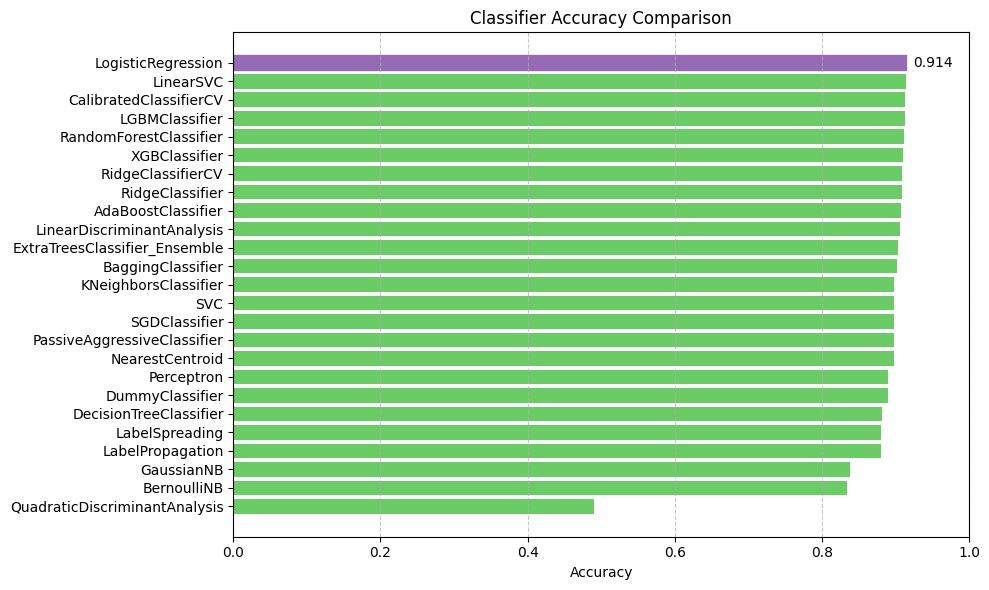

In [81]:
# Sort the models by accuracy
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1])
names, accuracies = zip(*sorted_models)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
# Use a muted color palette
muted_colors = sns.color_palette("muted")
plt.barh(names, accuracies, color=muted_colors[2])  # Use a color from the muted palette
plt.xlabel("Accuracy")
plt.title("Classifier Accuracy Comparison")
plt.xlim(0, 1)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
# Highlight the highest bar in a different muted color
bars = plt.barh(names, accuracies, color=muted_colors[2])  # Use a color from the muted palette
highest_accuracy_index = accuracies.index(max(accuracies))
bars[highest_accuracy_index].set_color(muted_colors[4])  # Use another color from the muted palette

# Annotate the highest bar with its value
plt.text(accuracies[highest_accuracy_index] + 0.01, highest_accuracy_index,
         f'{accuracies[highest_accuracy_index]:.3f}', va='center')

plt.show()

# Model Selection and Hyperparameter Tuning

In [ ]:
import wandb
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# --- Define Sweep Configuration ---
sweep_config = {
    'method': 'bayes', # Bayesian optimization
    'metric': {
        'name': 'cv_accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'C': {
            'distribution': 'log_uniform',
            'min': -5, # log10(1e-5)
            'max': 3  # log10(1e3)
        },
        'penalty': {
            'values': ['l1', 'l2', None]
        },
        'solver': {
            'values': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        },
        'class_weight': {
            'values': [None, 'balanced']
        },
        'tol': {
            'distribution': 'log_uniform',
            'min': -5, # log10(1e-5)
            'max': -2 # log10(1e-2)
        },
        'fit_intercept': {
            'values': [True, False]
        }
        # l1_ratio is REMOVED from parameters
    }
}

# --- Initialize W&B Sweep ---
PROJECT_NAME = "sample-ds-sweep-logistic-regression"
sweep_id = wandb.sweep(sweep_config, project=PROJECT_NAME)

# --- Global variables to track best run ---
best_sweep_accuracy = 0.0
best_sweep_config = None

# --- Define Agent Function to be run by Sweep ---
def train_sweep():
    global best_sweep_accuracy, best_sweep_config # Access global variables

    # Initialize W&B run for each agent iteration
    with wandb.init(project=PROJECT_NAME, job_type="sweep-optimization") as run:
        config = wandb.config

        params = {
            'C': config.C,
            'penalty': config.penalty,
            'solver': config.solver,
            'class_weight': config.class_weight,
            'tol': config.tol,
            'fit_intercept': config.fit_intercept
            # l1_ratio is REMOVED from params dictionary
        }

        # Handle solver and penalty combinations - simplified as l1_ratio is removed
        if params['penalty'] is None:
            params['solver'] = 'lbfgs' # Solver 'lbfgs' supports penalty=None
        elif params['penalty'] == 'elasticnet':
            params['solver'] = 'saga' # Solver 'saga' supports elasticnet penalty
            # l1_ratio retrieval is REMOVED as l1_ratio is not a parameter anymore
        elif params['penalty'] == 'l1':
            params['solver'] = 'liblinear' if params['solver'] not in ['saga', 'liblinear'] else params['solver'] # 'liblinear' or 'saga' for l1
        elif params['penalty'] == 'l2':
             params['solver'] = params['solver'] # Solver is already from config


        # Create Logistic Regression model with suggested parameters
        model = LogisticRegression(**params, random_state=42, max_iter=1000)

        # Perform Stratified K-Fold cross-validation (for potentially imbalanced data)
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # StratifiedKFold
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy') # Use StratifiedKFold
        score = scores.mean()

        # Log metrics and parameters to W&B for each run - simplified l1_ratio logging removed
        wandb.log({
            "cv_accuracy": score,
            "C": params['C'],
            "penalty": params['penalty'],
            "solver": params['solver'],
            "class_weight": params['class_weight'],
            "tol": params['tol'],
            "fit_intercept": params['fit_intercept'],
            "cv_fold_accuracy_std": scores.std()
        })
        print(f"Run finished - CV Accuracy: {score:.4f}")

        # --- Track best run ---
        if score > best_sweep_accuracy:
            best_sweep_accuracy = score
            best_sweep_config = dict(config) # Store a copy of the config



wandb.agent(sweep_id, function=train_sweep, count=100) # Run agent, adjust count as needed

# --- Print Best Run Summary After Sweep ---
print("\n--- Best Sweep Run Summary ---")
print(f"Best CV Accuracy: {best_sweep_accuracy:.4f}")
print("Best Hyperparameters:")
if best_sweep_config:
    for key, value in best_sweep_config.items():
        print(f"    {key}: {value}")
else:
    print("No successful runs to determine best hyperparameters.")

In [ ]:
# --- Print Best Run Summary After Sweep ---
print("\n--- Best Sweep Run Summary ---")
print(f"Best CV Accuracy: {best_sweep_accuracy:.4f}")
print("Best Hyperparameters:")
if best_sweep_config:
    for key, value in best_sweep_config.items():
        print(f"    {key}: {value}")
else:
    print("No successful runs to determine best hyperparameters.")

## Feature Importance/Selection

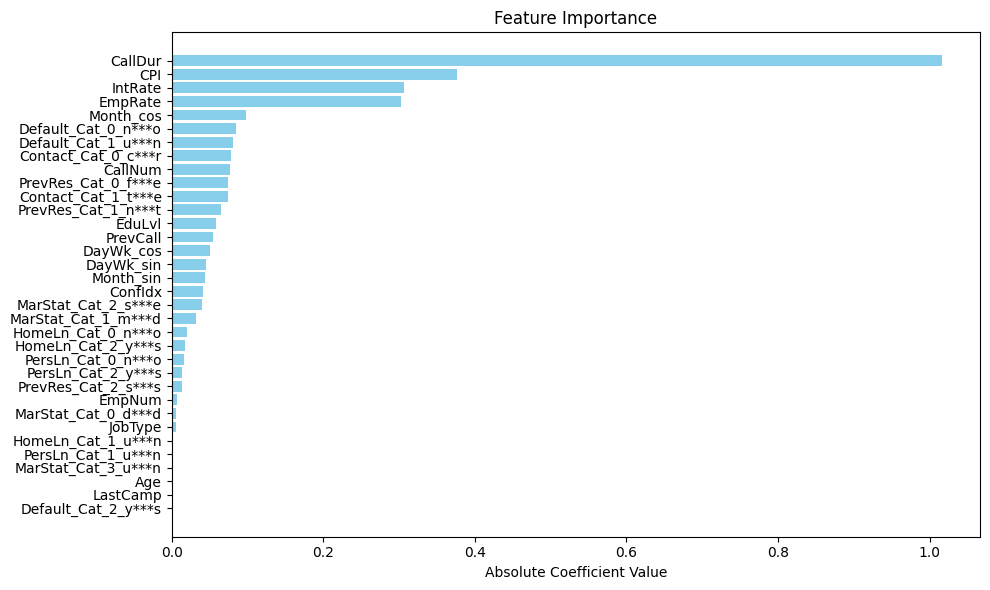

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    C=0.028406294177210252,
    class_weight=None,
    fit_intercept=False,
    penalty='l2',
    solver='lbfgs',
    tol=0.01310591897017129
)

model.fit(X_train, y_train)

# Get coefficients (assumes binary classification; model.coef_ is a 2D array)
coef = model.coef_[0]
features = X_train.columns

# Create a sorted list of features by their absolute coefficient values
feature_importance = sorted(zip(features, np.abs(coef)), key=lambda x: x[1], reverse=True)

# Separate features and importance for plotting
sorted_features, sorted_importance = zip(*feature_importance)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importance, color='skyblue')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel("Absolute Coefficient Value")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

In [39]:
# return list of >0.05 in feature importance
selected_features = [(f,imp) for f, imp in feature_importance if imp > 0.05]
selected_features

[('CallDur', np.float64(1.015528438589155)),
 ('CPI', np.float64(0.3757949213802469)),
 ('IntRate', np.float64(0.3060859086575921)),
 ('EmpRate', np.float64(0.30236707691633274)),
 ('Month_cos', np.float64(0.09769432882610551)),
 ('Default_Cat_0_n***o', np.float64(0.08541760481713516)),
 ('Default_Cat_1_u***n', np.float64(0.0815068557754019)),
 ('Contact_Cat_0_c***r', np.float64(0.0786406343230771)),
 ('CallNum', np.float64(0.07686393003842613)),
 ('PrevRes_Cat_0_f***e', np.float64(0.0748440123062534)),
 ('Contact_Cat_1_t***e', np.float64(0.07477418114396339)),
 ('PrevRes_Cat_1_n***t', np.float64(0.0653691210904342)),
 ('EduLvl', np.float64(0.05894192958681025)),
 ('PrevCall', np.float64(0.05516892788316482)),
 ('DayWk_cos', np.float64(0.05029871485855676))]

# Feature Trimming and Model Retraining

In [83]:
# only use cols from selected features
train_df_selected = train_df[[f for f, _ in selected_features] + ['Accept']]
test_df_selected = test_df[[f for f, _ in selected_features] + ['Accept']]

X_train = train_df_selected.drop('Accept', axis=1)
y_train = train_df_selected['Accept']
X_test = test_df_selected.drop('Accept', axis=1)
y_test = test_df_selected['Accept']

In [ ]:
import wandb
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# --- Define Sweep Configuration ---
sweep_config = {
    'method': 'bayes', # Bayesian optimization
    'metric': {
        'name': 'cv_accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'C': {
            'distribution': 'log_uniform',
            'min': -5, # log10(1e-5)
            'max': 3  # log10(1e3)
        },
        'penalty': {
            'values': ['l1', 'l2', None]
        },
        'solver': {
            'values': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        },
        'class_weight': {
            'values': [None, 'balanced']
        },
        'tol': {
            'distribution': 'log_uniform',
            'min': -5, # log10(1e-5)
            'max': -2 # log10(1e-2)
        },
        'fit_intercept': {
            'values': [True, False]
        }
        # l1_ratio is REMOVED from parameters
    }
}

# --- Initialize W&B Sweep ---
PROJECT_NAME = "sample-ds-sweep-logistic-regression"
sweep_id = wandb.sweep(sweep_config, project=PROJECT_NAME)

# --- Global variables to track best run ---
best_sweep_accuracy = 0.0
best_sweep_config = None

# --- Define Agent Function to be run by Sweep ---
def train_sweep():
    global best_sweep_accuracy, best_sweep_config # Access global variables

    # Initialize W&B run for each agent iteration
    with wandb.init(project=PROJECT_NAME, job_type="sweep-optimization") as run:
        config = wandb.config

        params = {
            'C': config.C,
            'penalty': config.penalty,
            'solver': config.solver,
            'class_weight': config.class_weight,
            'tol': config.tol,
            'fit_intercept': config.fit_intercept
            # l1_ratio is REMOVED from params dictionary
        }

        # Handle solver and penalty combinations - simplified as l1_ratio is removed
        if params['penalty'] is None:
            params['solver'] = 'lbfgs' # Solver 'lbfgs' supports penalty=None
        elif params['penalty'] == 'elasticnet':
            params['solver'] = 'saga' # Solver 'saga' supports elasticnet penalty
            # l1_ratio retrieval is REMOVED as l1_ratio is not a parameter anymore
        elif params['penalty'] == 'l1':
            params['solver'] = 'liblinear' if params['solver'] not in ['saga', 'liblinear'] else params['solver'] # 'liblinear' or 'saga' for l1
        elif params['penalty'] == 'l2':
             params['solver'] = params['solver'] # Solver is already from config


        # Create Logistic Regression model with suggested parameters
        model = LogisticRegression(**params, random_state=42, max_iter=1000)

        # Perform Stratified K-Fold cross-validation (for potentially imbalanced data)
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # StratifiedKFold
        scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy') # Use StratifiedKFold
        score = scores.mean()

        # Log metrics and parameters to W&B for each run - simplified l1_ratio logging removed
        wandb.log({
            "cv_accuracy": score,
            "C": params['C'],
            "penalty": params['penalty'],
            "solver": params['solver'],
            "class_weight": params['class_weight'],
            "tol": params['tol'],
            "fit_intercept": params['fit_intercept'],
            "cv_fold_accuracy_std": scores.std()
        })
        print(f"Run finished - CV Accuracy: {score:.4f}")

        # --- Track best run ---
        if score > best_sweep_accuracy:
            best_sweep_accuracy = score
            best_sweep_config = dict(config) # Store a copy of the config



wandb.agent(sweep_id, function=train_sweep, count=100) # Run agent, adjust count as needed

# --- Print Best Run Summary After Sweep ---
print("\n--- Best Sweep Run Summary ---")
print(f"Best CV Accuracy: {best_sweep_accuracy:.4f}")
print("Best Hyperparameters:")
if best_sweep_config:
    for key, value in best_sweep_config.items():
        print(f"    {key}: {value}")
else:
    print("No successful runs to determine best hyperparameters.")

In [47]:
# --- Print Best Run Summary After Sweep ---
print("\n--- Best Sweep Run Summary ---")
print(f"Best CV Accuracy: {best_sweep_accuracy:.4f}")
print("Best Hyperparameters:")
if best_sweep_config:
    for key, value in best_sweep_config.items():
        print(f"    {key}: {value}")
else:
    print("No successful runs to determine best hyperparameters.")


--- Best Sweep Run Summary ---
Best CV Accuracy: 0.9311
Best Hyperparameters:
    C: 0.42051980805969136
    class_weight: None
    fit_intercept: True
    penalty: l1
    solver: sag
    tol: 0.020332240520544276


## Feature Importance/Selection

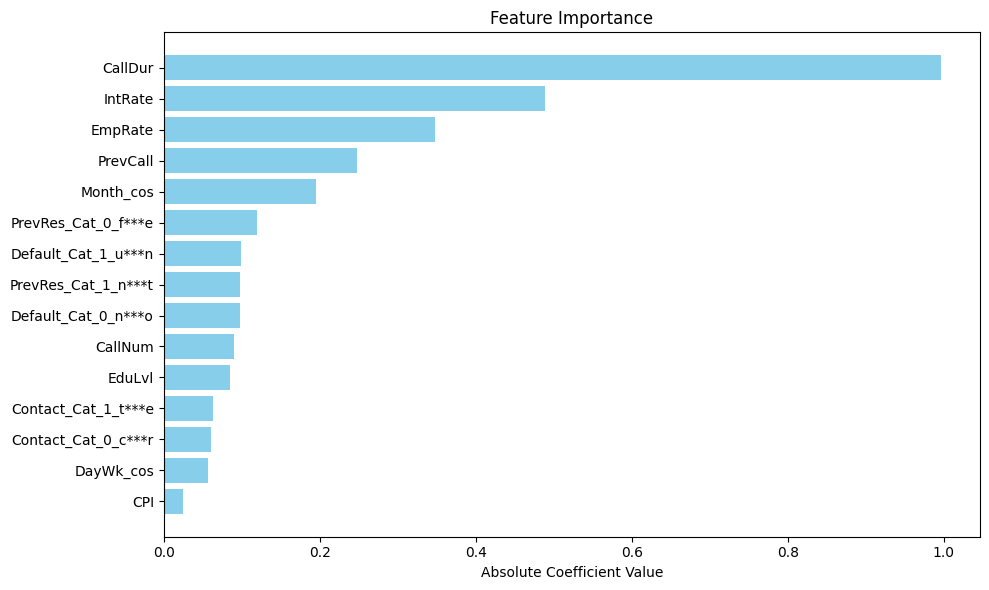

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    C=0.028406294177210252,
    class_weight=None,
    fit_intercept=False,
    penalty='l2',
    solver='lbfgs',
    tol=0.01310591897017129
)

model.fit(X_train, y_train)

# Get coefficients (assumes binary classification; model.coef_ is a 2D array)
coef = model.coef_[0]
features = X_train.columns

# Create a sorted list of features by their absolute coefficient values
feature_importance = sorted(zip(features, np.abs(coef)), key=lambda x: x[1], reverse=True)

# Separate features and importance for plotting
sorted_features, sorted_importance = zip(*feature_importance)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_features)), sorted_importance, color='skyblue')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel("Absolute Coefficient Value")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()

## Confusion Matrix/Misc Viz

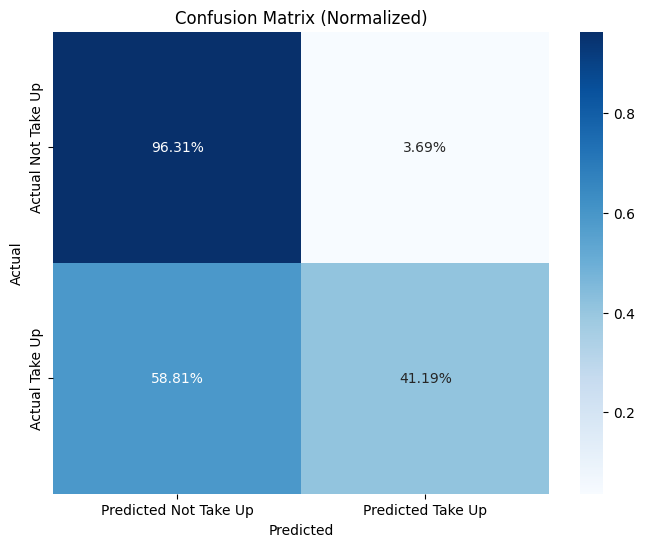

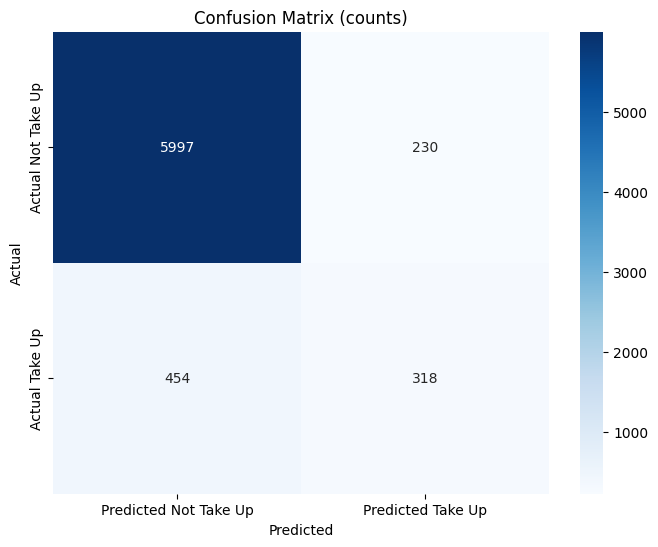

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np 


y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Store the confusion matrix values into variables
tn, fp, fn, tp = cm.ravel()

# Normalize the confusion matrix (get percentages)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Blues",
            xticklabels=['Predicted Not Take Up', 'Predicted Take Up'],
            yticklabels=['Actual Not Take Up', 'Actual Take Up'])
plt.title('Confusion Matrix (Normalized)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#you can also show non-normalized
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Not Take Up', 'Predicted Take Up'],
            yticklabels=['Actual Not Take Up', 'Actual Take Up'])
plt.title('Confusion Matrix (counts)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

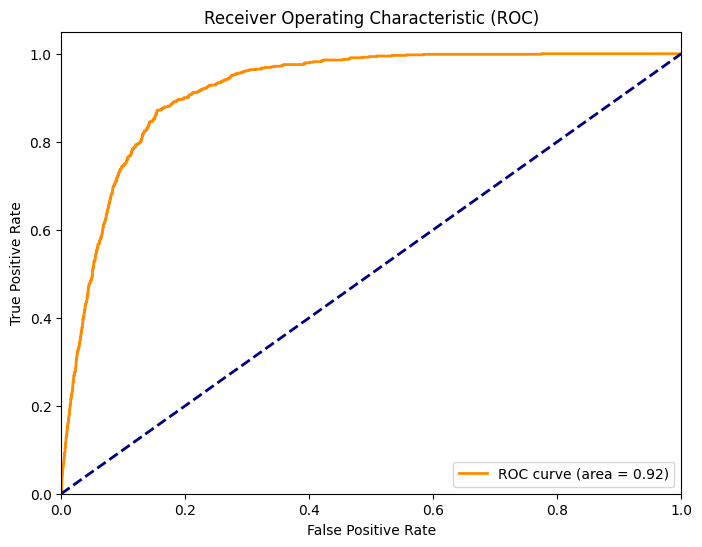

In [50]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

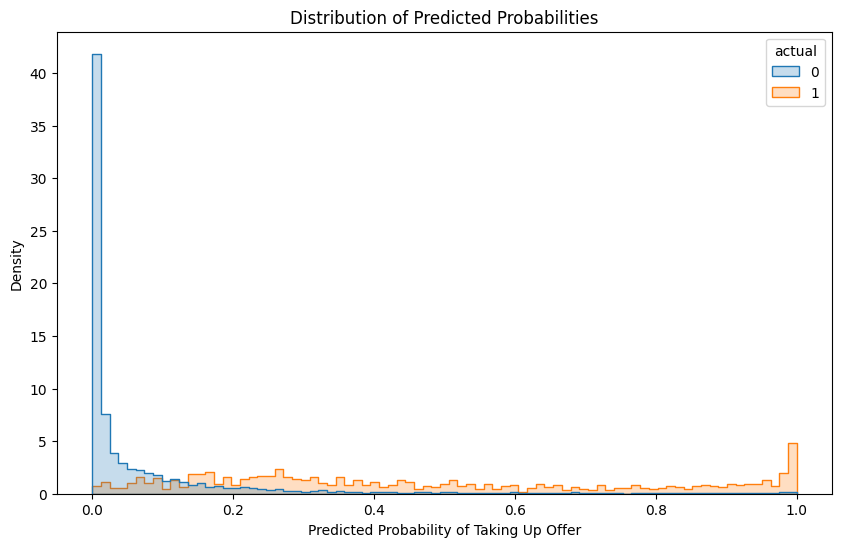

In [51]:
import pandas as pd

# Create a DataFrame for easier plotting
df_preds = pd.DataFrame({'actual': y_test, 'predicted_probability': y_pred_proba})

plt.figure(figsize=(10, 6))
sns.histplot(data=df_preds, x='predicted_probability', hue='actual', element='step', stat='density', common_norm=False)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability of Taking Up Offer')
plt.ylabel('Density')
plt.show()

## Campaign Summary

In [122]:
tn, fp, fn, tp = 5997, 230, 454, 318
tn, fp, fn, tp

(5997, 230, 454, 318)

In [123]:
import numpy as np
import pandas as pd

def calculate_campaign_results(tp, tn, fp, fn, risk_distribution, profit_estimates):
    """
    Calculates campaign results based on confusion matrix values, risk distribution, and profit estimates.

    Args:
        tp (int): Number of True Positives.
        tn (int): Number of True Negatives.
        fp (int): Number of False Positives.
        fn (int): Number of False Negatives.
        risk_distribution (dict): Dictionary mapping risk bands (e.g., 'High', 'Medium', 'Low')
                                  to their percentages (as decimals, e.g., 0.10 for 10%).
        profit_estimates (dict): Dictionary mapping risk bands to dictionaries containing
                                 'Taken Up' and 'Not Taken Up' profit/loss estimates.
                                  Example:
                                  {
                                      'High': {'Taken Up': 292.5, 'Not Taken Up': -300},
                                      'Medium': {'Taken Up': 705, 'Not Taken Up': -300},
                                      'Low': {'Taken Up': 1225, 'Not Taken Up': -300}
                                  }

    Returns:
        tuple: A tuple containing:
            - percentages_df (pd.DataFrame): DataFrame of customer counts per category and risk band (percentages of the 10k).
            - risk_bands_df (pd.DataFrame): DataFrame of customer counts per category and risk band.
            - expected_profit_df (pd.DataFrame): DataFrame of expected profit per category and risk band.
            - total_expected_net_profit (float): Total expected net profit.
            - total_lost_opportunity_cost (float): Total lost opportunity cost.
            - summary_df (pd.DataFrame): Summary table of results
    """
    total_customers = 10000
    total_model = tp + tn + fp + fn

    # --- 1. Percentages of the 10k Customer List (from Model) ---
    percentages = {
        'TP': tp / total_model,
        'TN': tn / total_model,
        'FP': fp / total_model,
        'FN': fn / total_model
    }
     # --- 1b. mapping Percentages of the 10k Customer List (from Model) ---
    percentages_map = {
        'TP': tp / total_model * total_customers,
        'TN': tn / total_model* total_customers,
        'FP': fp / total_model* total_customers,
        'FN': fn / total_model* total_customers
    }

    # --- 2. Overlay Risk Bands ---
    risk_bands = {}
    for category, count in percentages_map.items():
        risk_bands[category] = {}
        for risk_band, percentage in risk_distribution.items():
            risk_bands[category][risk_band] = count * percentage

    risk_bands_df = pd.DataFrame(risk_bands).T  # Transpose for desired structure

    # --- 3. Calculate Expected Profit per Category/Risk Band ---
    expected_profit = {}
    for category, risk_counts in risk_bands.items():
        expected_profit[category] = {}
        for risk_band, count in risk_counts.items():
            if category in ('TP', 'FN'):  # Use "Taken Up" profit for TP and FN
                profit = profit_estimates[risk_band]['Taken Up']
            else:  # Use "Not Taken Up" loss for TN and FP
                profit = profit_estimates[risk_band]['Not Taken Up']
            expected_profit[category][risk_band] = count * profit

    expected_profit_df = pd.DataFrame(expected_profit).T

    # --- 4. Total Expected Net Profit ---
    total_expected_net_profit = expected_profit_df.values.sum()

    # --- 5. Lost Opportunity Cost ---
    lost_opportunity = {}
    for category, risk_counts in risk_bands.items():
      lost_opportunity[category] = {}
      for risk_band, count in risk_counts.items():
        if category == 'FN':
          profit = profit_estimates[risk_band]['Taken Up']
          lost_opportunity['FN'][risk_band] = count * profit
        if category == 'FP':
          profit = profit_estimates[risk_band]['Not Taken Up']
          lost_opportunity['FP'][risk_band] = count * profit

    total_lost_opportunity_cost = 0
    for category, risk_opportunity in lost_opportunity.items():
       if category in ('FN','FP'):
        total_lost_opportunity_cost += np.sum(list(risk_opportunity.values()))


    # --- Create Summary DataFrame ---
    summary_data = {
      'Metric': ['Total Expected Net Profit', 'Total Lost Opportunity Cost'],
      'Value': [total_expected_net_profit, total_lost_opportunity_cost]
    }
    summary_df = pd.DataFrame(summary_data)

    # --- return percentages ---

    percentages_data = {}
    for category, risk_counts in risk_bands.items():
        percentages_data[category] = {}
        for risk, num in risk_counts.items():
            percentages_data[category][risk] =  num / total_customers * 100
    percentages_df = pd.DataFrame(percentages_data).T


    return percentages_df, risk_bands_df, expected_profit_df, total_expected_net_profit, total_lost_opportunity_cost, summary_df


# Risk distribution (from the problem statement)
risk_distribution = {
    'High': 0.10,
    'Medium': 0.25,
    'Low': 0.65
}

# Profit estimates (from the problem statement)
profit_estimates = {
    'High': {'Taken Up': 285, 'Not Taken Up': -300},
    'Medium': {'Taken Up': 700, 'Not Taken Up': -300},
    'Low': {'Taken Up': 1225, 'Not Taken Up': -300}       
}

# Call the function
percentages, risk_bands_results, expected_profit_results, total_profit, total_loss, summary_results = calculate_campaign_results(
    tp, tn, fp, fn, risk_distribution, profit_estimates
)


# print fp, fn, tp, tn
print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}\n")


print("Percentages of 10k Customers:\n", percentages)
print("\nRisk Bands Distribution (Counts):\n", risk_bands_results)

print("\nExpected Profit per Category/Risk Band:")
print(expected_profit_results.applymap(lambda x: f"{x:,.2f}"))

print("\nTotal Expected Net Profit:", f"{total_profit:,.2f}")
print("Total Lost Opportunity Cost:", f"{total_loss:,.2f}")

print("\nSummary:")
summary_results_formatted = summary_results.copy()
summary_results_formatted['Value'] = summary_results_formatted['Value'].apply(lambda x: f"{x:,.2f}")
print(summary_results_formatted)

TP: 318, TN: 5997, FP: 230, FN: 454

Percentages of 10k Customers:
         High     Medium        Low
TP  0.454351   1.135877   2.953279
TN  8.568367  21.420917  55.694385
FP  0.328618   0.821546   2.136019
FN  0.648664   1.621660   4.216317

Risk Bands Distribution (Counts):
           High       Medium          Low
TP   45.435062   113.587655   295.327904
TN  856.836691  2142.091727  5569.438491
FP   32.861837    82.154594   213.601943
FN   64.866409   162.166024   421.631662

Expected Profit per Category/Risk Band:
           High       Medium            Low
TP    12,948.99    79,511.36     361,776.68
TN  -257,051.01  -642,627.52  -1,670,831.55
FP    -9,858.55   -24,646.38     -64,080.58
FN    18,486.93   113,516.22     516,498.79

Total Expected Net Profit: -1,566,356.62
Total Lost Opportunity Cost: 549,916.42

Summary:
                        Metric          Value
0    Total Expected Net Profit  -1,566,356.62
1  Total Lost Opportunity Cost     549,916.42


C:\Users\Christian\AppData\Local\Temp\ipykernel_17668\1920290092.py:142: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(expected_profit_results.applymap(lambda x: f"{x:,.2f}"))


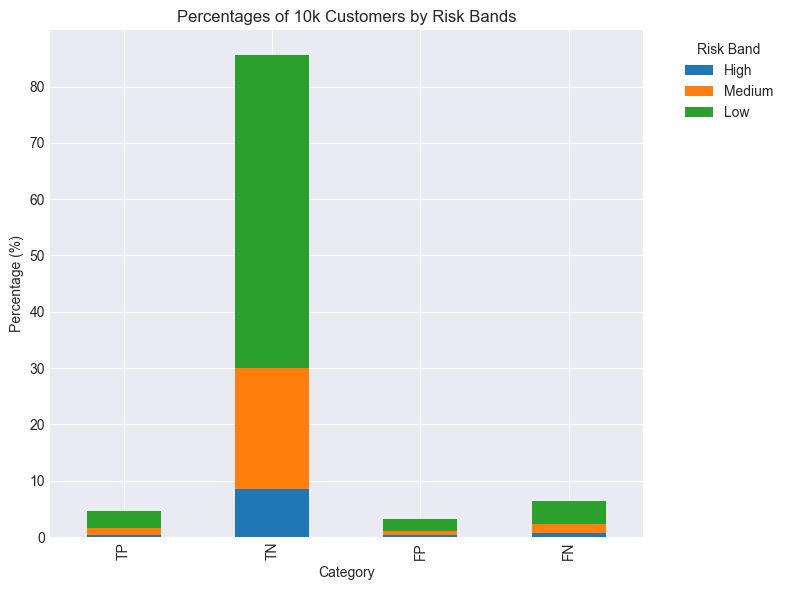

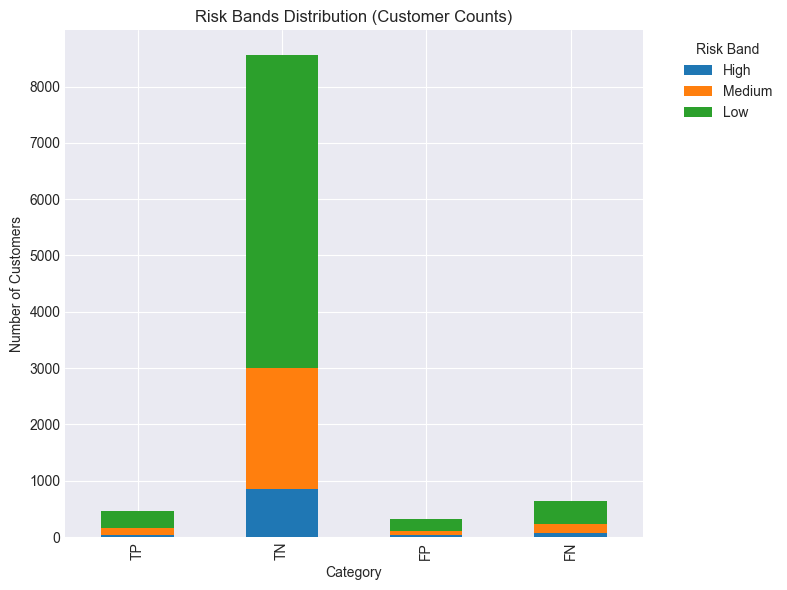

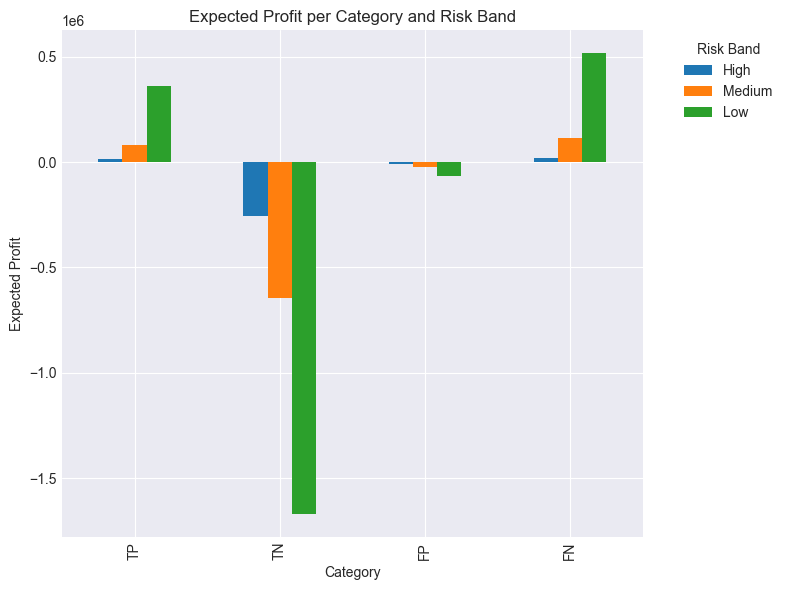

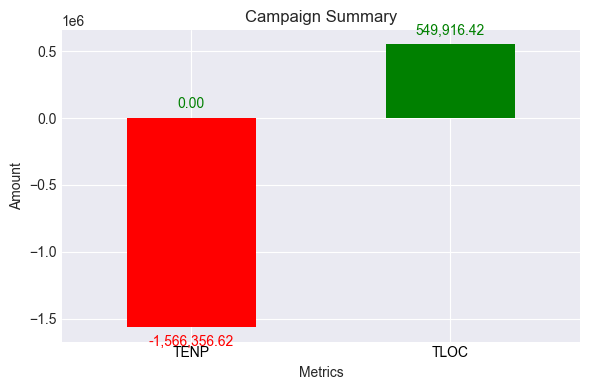

In [131]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def calculate_campaign_results(tp, tn, fp, fn, risk_distribution, profit_estimates):
    total_customers = 10000
    total_model = tp + tn + fp + fn

    # Percentages of the 10k Customer List (from Model)
    percentages_map = {
        'TP': tp / total_model * total_customers,
        'TN': tn / total_model * total_customers,
        'FP': fp / total_model * total_customers,
        'FN': fn / total_model * total_customers
    }

    # Overlay Risk Bands
    risk_bands = {}
    for category, count in percentages_map.items():
        risk_bands[category] = {}
        for risk_band, percentage in risk_distribution.items():
            risk_bands[category][risk_band] = count * percentage

    risk_bands_df = pd.DataFrame(risk_bands).T

    # Calculate Expected Profit per Category/Risk Band
    expected_profit = {}
    for category, risk_counts in risk_bands.items():
        expected_profit[category] = {}
        for risk_band, count in risk_counts.items():
            if category in ('TP', 'FN'):
                profit = profit_estimates[risk_band]['Taken Up']
            else:
                profit = profit_estimates[risk_band]['Not Taken Up']
            expected_profit[category][risk_band] = count * profit

    expected_profit_df = pd.DataFrame(expected_profit).T

    # Total Expected Net Profit
    total_expected_net_profit = expected_profit_df.values.sum()

    # Lost Opportunity Cost
    lost_opportunity = {}
    for category, risk_counts in risk_bands.items():
        lost_opportunity[category] = {}
        for risk_band, count in risk_counts.items():
            if category == 'FN':
                profit = profit_estimates[risk_band]['Taken Up']
                lost_opportunity['FN'][risk_band] = count * profit
            if category == 'FP':
                profit = profit_estimates[risk_band]['Not Taken Up']
                lost_opportunity['FP'][risk_band] = count * profit

    total_lost_opportunity_cost = 0
    for category, risk_opportunity in lost_opportunity.items():
        if category in ('FN', 'FP'):
            total_lost_opportunity_cost += np.sum(list(risk_opportunity.values()))

    # Summary DataFrame
    summary_data = {
        'Metric': ['Total Expected Net Profit', 'Total Lost Opportunity Cost'],
        'Value': [total_expected_net_profit, total_lost_opportunity_cost]
    }
    summary_df = pd.DataFrame(summary_data)

    # Percentages DataFrame (for a visualization of percentages)
    percentages_data = {}
    for category, risk_counts in risk_bands.items():
        percentages_data[category] = {}
        for risk, num in risk_counts.items():
            percentages_data[category][risk] = num / total_customers * 100
    percentages_df = pd.DataFrame(percentages_data).T

    return percentages_df, risk_bands_df, expected_profit_df, total_expected_net_profit, total_lost_opportunity_cost, summary_df


risk_distribution = {
    'High': 0.10,
    'Medium': 0.25,
    'Low': 0.65
}

profit_estimates = {
    'High': {'Taken Up': 285, 'Not Taken Up': -300},
    'Medium': {'Taken Up': 700, 'Not Taken Up': -300},
    'Low': {'Taken Up': 1225, 'Not Taken Up': -300}
}

# --- Calculate campaign results ---
percentages_df, risk_bands_df, expected_profit_df, total_profit, total_loss, summary_df = calculate_campaign_results(
    tp, tn, fp, fn, risk_distribution, profit_estimates
)

# --- Visualization Settings ---
plt.style.use('seaborn-v0_8-darkgrid')

# Plot 1: Percentages Distribution (Stacked Bar Chart)
fig1, ax1 = plt.subplots(figsize=(8, 6))
percentages_df.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Percentages of 10k Customers by Risk Bands')
ax1.set_ylabel('Percentage (%)')
ax1.set_xlabel('Category')
plt.legend(title='Risk Band', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Plot 2: Risk Bands Distribution in Counts (Stacked Bar Chart)
fig2, ax2 = plt.subplots(figsize=(8, 6))
risk_bands_df.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Risk Bands Distribution (Customer Counts)')
ax2.set_ylabel('Number of Customers')
ax2.set_xlabel('Category')
plt.legend(title='Risk Band', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Plot 3: Expected Profit per Category/Risk Band (Grouped Bar Chart)
fig3, ax3 = plt.subplots(figsize=(8, 6))
expected_profit_df.plot(kind='bar', ax=ax3)
ax3.set_title('Expected Profit per Category and Risk Band')
ax3.set_ylabel('Expected Profit')
ax3.set_xlabel('Category')
plt.legend(title='Risk Band', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()




fig4, ax4 = plt.subplots(figsize=(6, 4))

# Separate positive and negative values for coloring
summary_df['Positive'] = summary_df['Value'].apply(lambda x: x if x >= 0 else 0)
summary_df['Negative'] = summary_df['Value'].apply(lambda x: x if x < 0 else 0)

# Plot positive values in green and negative in red
summary_df.plot(x='Metric', y='Positive', kind='bar', ax=ax4, legend=False, color='green', label='Positive')
summary_df.plot(x='Metric', y='Negative', kind='bar', ax=ax4, legend=False, color='red', label='Negative')

ax4.set_title('Campaign Summary')
ax4.set_ylabel('Amount')
ax4.set_xlabel('Metrics')

# Abbreviate x-axis labels
abbreviated_labels = ['TENP', 'TLOC']  # Total Expected Net Profit, Total Lost Opportunity Cost
ax4.set_xticklabels(abbreviated_labels, rotation=0, ha='center', color='black') #rotation 0

# Annotate bars with values, colored based on value
for container in ax4.containers:
    for bar in container:
        value = bar.get_height()
        label = f'{value:,.2f}'  # Format with commas
        color = 'green' if value >= 0 else 'red'
        ax4.annotate(label,
                     (bar.get_x() + bar.get_width() / 2, value),
                     ha='center', va='bottom' if value >= 0 else 'top',
                     color=color,
                     textcoords="offset points",
                     xytext=(0, 5) if value>=0 else (0,-5)) #add this

plt.tight_layout()
plt.show()

In [105]:
sum = tp + tn + fp + fn
tp, tn, fp, fn

(np.int64(318), np.int64(5997), np.int64(230), np.int64(454))

In [106]:
tp_ = tp/sum * 10000
tp_

np.float64(454.3506215173596)

In [107]:
tpH = tp_ * 0.10
tpM = tp_ * 0.25
tpL = tp_ * 0.65

tpH, tpM, tpL

(np.float64(45.43506215173596),
 np.float64(113.5876553793399),
 np.float64(295.3279039862838))

In [108]:
tpH*285

np.float64(12948.99271324475)

In [112]:
tpM*700

np.float64(79511.35876553794)

In [111]:
tpL*1225

np.float64(361776.68238319765)